<a href="https://colab.research.google.com/github/tayfununal/hamiltonian_ex/blob/main/eulerverlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [350]:
#simplektik euler
import numpy as np
import matplotlib.pyplot as plt

def symplectic_euler(h=0.1, initial_point= [1., 0.]):

    t = np.arange(0, 2*np.pi, h)

    q = np.zeros(t.shape[0])
    p = np.zeros(t.shape[0])

    q[0] = initial_point[0]
    p[0] = initial_point[1]
    
    for i in range(0, t.shape[0]-1):
      q[i + 1] = (1-h**2) * q[i] + h * p[i]
      p[i + 1] = p[i] - h * q[i]

    return q, p, t

q , p, t = symplectic_euler()
print("shape of q :", q.shape ,"\nshape of p:", p.shape, "\nsize of t:", len(t))

shape of q : (63,) 
shape of p: (63,) 
size of t: 63


In [351]:
def grand_truth_plot(h = 0.1):
  t = np.arange(0,2*np.pi,0.3)
  x = np.cos(t)
  y = np.sin(t)
  plt.scatter(x,y)

def pred_plot(q, p):
  plt.plot(p[:, ], q[:,], c = "red")
  plt.xlabel('q')
  plt.ylabel('p')

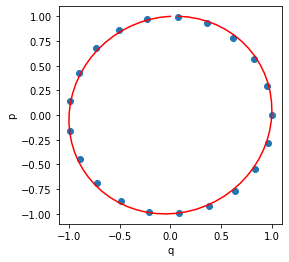

In [352]:
plt.figure(figsize = (4, 4))

# Simplectic solution plot
pred_plot(q=q, p=p)

# Grand truth solution plot
grand_truth_plot()
plt.show()

In [353]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

In [354]:
target = np.concatenate((q.reshape(-1,1), p.reshape(-1,1)) , axis=1)
"""shuffling = np.concatenate((target, t.reshape(-1,1)), axis=1)
np.random.shuffle(shuffling)

target = np.concatenate((shuffling[:,0].reshape(-1,1), shuffling[:,1].reshape(-1,1)), axis=1)
t = shuffling[:,2]
print('target:',target, '\nt:',t)"""

"shuffling = np.concatenate((target, t.reshape(-1,1)), axis=1)\nnp.random.shuffle(shuffling)\n\ntarget = np.concatenate((shuffling[:,0].reshape(-1,1), shuffling[:,1].reshape(-1,1)), axis=1)\nt = shuffling[:,2]\nprint('target:',target, '\nt:',t)"

In [355]:
inp = Input(shape=(1,))

x = Dense(64, activation="tanh")(inp)
x = Dense(64, activation="tanh")(x)

out = Dense(2)(x)

model = Model(inputs=inp, outputs=out)
model.summary()

Model: "model_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_108 (Dense)           (None, 64)                128       
                                                                 
 dense_109 (Dense)           (None, 64)                4160      
                                                                 
 dense_110 (Dense)           (None, 2)                 130       
                                                                 
Total params: 4,418
Trainable params: 4,418
Non-trainable params: 0
_________________________________________________________________


In [356]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt , loss="mse")
model.fit(x=t, y=target , epochs=1000, batch_size=16)

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4910
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4699
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.4302
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4053
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3747
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3540
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3359
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.3262
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.3046
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2872
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2811
Epoch 12/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2721
Epoch 13/1000
4/4 [==============================

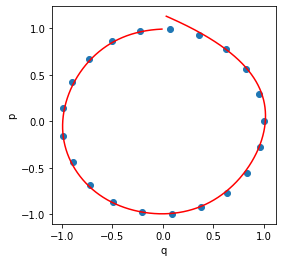

In [357]:
# prediction q and p Using NN and with test_t 
test_t = np.arange(0, 2*np.pi, 0.001)
prediction = model(test_t).numpy()

q = prediction[:,0]
p = prediction[:,1]

plt.figure(figsize = (4, 4))

# NN with mse solition 
pred_plot(q, p )

# Grand truth solution plot
grand_truth_plot()

plt.show()

In [358]:
# NN model with Hamiltonian preserved loss
inp = Input(shape=(2,))

x = Dense(64, activation="tanh")(inp)
x = Dense(64, activation="tanh")(x)

out = Dense(2)(x)

model2 = Model(inputs=inp, outputs=out)

In [359]:
def H(z):
  return tf.reduce_sum((z**2)/2,axis=1)

def custom_loss(y_true, y_pred):
  return (1/32) *(y_true - H(y_pred))**2

In [360]:
# Hamiltonian preserved for initial point and we extend this for all test_t
h_0 = np.array([0.5 for i in range(test_t.shape[0])])

In [361]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model2.compile(optimizer=opt, loss=custom_loss)
model2.fit(x = prediction, y = h_0, epochs=100, batch_size=32)

Epoch 1/100
197/197 [==============================] - 1s 2ms/step - loss: 3.1961e-04
Epoch 2/100
197/197 [==============================] - 0s 2ms/step - loss: 1.0606e-05
Epoch 3/100
197/197 [==============================] - 0s 2ms/step - loss: 9.5160e-06
Epoch 4/100
197/197 [==============================] - 0s 2ms/step - loss: 8.3309e-06
Epoch 5/100
197/197 [==============================] - 0s 2ms/step - loss: 6.7000e-06
Epoch 6/100
197/197 [==============================] - 0s 2ms/step - loss: 7.0428e-06
Epoch 7/100
197/197 [==============================] - 0s 2ms/step - loss: 6.0357e-06
Epoch 8/100
197/197 [==============================] - 0s 2ms/step - loss: 6.0724e-06
Epoch 9/100
197/197 [==============================] - 0s 2ms/step - loss: 6.0230e-06
Epoch 10/100
197/197 [==============================] - 0s 2ms/step - loss: 6.1735e-06
Epoch 11/100
197/197 [==============================] - 0s 2ms/step - loss: 6.2168e-06
Epoch 12/100
197/197 [==============================

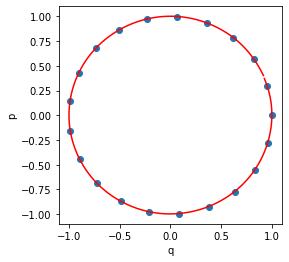

In [362]:
test_t = np.arange(0, 2*np.pi, 0.0001)

prediction_with_hamiltonian_preserved = model2(model(test_t))

q = prediction_with_hamiltonian_preserved[:,0]
p = prediction_with_hamiltonian_preserved[:,1]

plt.figure(figsize = (4, 4))
pred_plot(q=q, p=p)

grand_truth_plot()
plt.show()

In [363]:
#verlet
import math
import numpy as np

def verlet(h = 0.05, initial_point=[1., 0.]):
  t = np.arange(0, 2*np.pi, h)

  qv = np.zeros(t.shape[0])
  pv = np.zeros(t.shape[0])

  qv[0] = initial_point[0]
  pv[0] = initial_point[1]
  
  for i in range(0 ,t.shape[0]-1):
    ara_p = pv[i] - h/2 * qv[i]

    qv[i+1] = qv[i] + h * (pv[i] - h/2 * qv[i])

    pv[i+1] = ara_p - h/2 * (qv[i] + h * (pv[i] - h/2 * qv[i]))

  return qv, pv, t

q, p, t = verlet()
#print("q", q ,"\np", p)

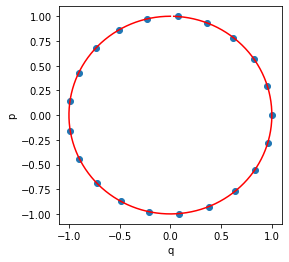

In [364]:
plt.figure(figsize = (4, 4))

pred_plot(q=q, p=p)

grand_truth_plot()
plt.show()
      